In [8]:
import numpy as np
import recombination as rb

# the running time of the notebook could be quite long (however less than 1 hour). 
# it is suggested to try with a sample value of 10 to experiment.

sample = 100

In [9]:
# comment/uncomment if you want to try the symmetric/non symmeric case

######################## SYMMETRIC
# n = np.linspace(2,70,13)
# n = np.append(n,[85,100])
###################################

#################### NON SYMMETRIC
n = np.linspace(2,40,10)
###################################

n = n.astype(int)
N = [100,1000,10000,1000000]

print(n)
print(N)

t = np.zeros([len(n), len(N), sample])
ERR = np.zeros([len(n), len(N), sample])
iterations = np.zeros([len(n), len(N), sample])
eliminated_points = np.zeros([len(n), len(N), sample])

[ 2  6 10 14 18 23 27 31 35 40]
[100, 1000, 10000, 1000000]


In [10]:
# comment/uncomment if you want to try the symmetric/non symmeric case

for i in range(len(n)):
    for j in range(len(N)):
        if N[j]<2*n[i]:
            continue

        print('n =', n[i],', N =', N[j])

        for k in range(sample):

            print('sample number =', k)
            
############# SYMMETRIC
#             X = np.random.normal(0.,1., (N[j],n[i]))
###################################
    
############# NON SYMMETRIC
            X = np.random.exponential(1., (N[j],int(n[i]/2)))
            X = np.append(X,np.random.exponential(5., (N[j],int(n[i]/2))),axis=1)
###################################
            
            w_star, _, _, t[i,j,k], ERR[i,j,k], _, _ = rb.recomb_log(X,n[i]**3)
            
            print(all(w_star>0) and np.round(np.sum(w_star),6)==1)


n = 2 , N = 100
sample number = 0
True
sample number = 1
True
sample number = 2
True
sample number = 3
True
sample number = 4
True
sample number = 5
True
sample number = 6
True
sample number = 7
True
sample number = 8
True
sample number = 9
True
sample number = 10
True
sample number = 11
True
sample number = 12
True
sample number = 13
True
sample number = 14
True
sample number = 15
True
sample number = 16
True
sample number = 17
True
sample number = 18
True
sample number = 19
True
sample number = 20
True
sample number = 21
True
sample number = 22
True
sample number = 23
True
sample number = 24
True
sample number = 25
True
sample number = 26
True
sample number = 27
True
sample number = 28
True
sample number = 29
True
sample number = 30
True
sample number = 31
True
sample number = 32
True
sample number = 33
True
sample number = 34
True
sample number = 35
True
sample number = 36
True
sample number = 37
True
sample number = 38
True
sample number = 39
True
sample number = 40
True
sample num

In [11]:
# if max_err is not 0 it means there have been problems.
# ERR* = 2 means no solution found (using the assigne value of maximum iteration)
# although for the considered cases we have not experienced this situation, it could happen for the basic algo if max_iter is low
# ERR* = 3 means the weights do not sum up to 1 or they are not between 0 or 1
# caused by numerical error
# for the other errors read recombination.py

print("ERROR =", np.max(ERR))
print("mean t = ", np.mean(t,axis=2))

ERROR = 0.0
mean t =  [[4.75224430e-04 1.32750884e-03 1.11018802e-03 4.61960152e-02]
 [9.68189240e-04 1.40912099e-03 1.43994246e-03 6.21942852e-02]
 [2.20418151e-03 1.52363333e-03 2.94289418e-03 1.31412189e-01]
 [4.17146013e-03 2.90851722e-03 6.01470544e-03 1.70860528e-01]
 [9.25870731e-03 4.96875743e-03 1.06180068e-02 2.11555930e-01]
 [1.98111810e-02 7.79950109e-03 1.70191565e-02 2.61158386e-01]
 [6.43894007e-02 1.31136577e-02 2.76334473e-02 3.19279433e-01]
 [1.51618261e-01 2.34780669e-02 4.88876092e-02 4.02854139e-01]
 [4.92438859e-01 4.71823181e-02 8.76641019e-02 4.80426814e-01]
 [2.20395699e+00 1.50845084e-01 2.14244262e-01 7.63284051e-01]]


In [12]:
import copy

n_copy = copy.copy(n)
t_copy = copy.copy(t)
iter_copy = copy.copy(iterations)

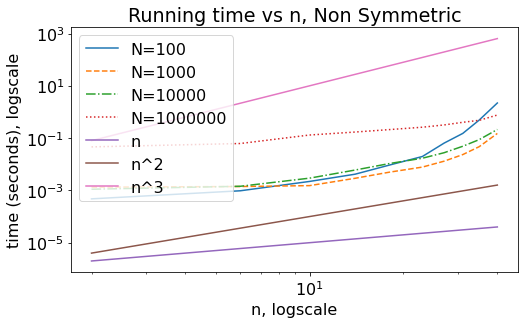

In [14]:
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(8,4.5))

x = n_copy
y = np.mean(t_copy,axis=2).T
error = np.std(t_copy,axis=2).T

idx = y>0
plt.plot(x[idx[0]], y[0,idx[0]], '-', label="N=%d"%(N[0]))
plt.plot(x[idx[1]], y[1,idx[1]], '--', label="N=%d"%(N[1]))
plt.plot(x[idx[3]], y[2,idx[2]], '-.', label="N=%d"%(N[2]))
plt.plot(x[idx[3]], y[3,idx[3]].T, ':', label="N=%d"%(N[3]))

plt.plot(n, 0.000001*n,'-', label = "n")
plt.plot(n, 0.000001*n**2,'-', label = "n^2")
plt.plot(n, 0.01*n**3,'-', label = "n^3")
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.title('Running time vs n, Non Symmetric')
plt.xlabel('n, logscale')
plt.ylabel('time (seconds), logscale')
# plt.savefig('study_vs_n_time_100sample_NONsymmeric.pdf', bbox_inches='tight')
plt.show()